# Task 25: Logistic Regression from Scratch:

**Logistic regression** is a supervised learning algorithm, Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set.
<br>
Logistic Regression from scratch involves building a classification model by implementing the logistic function and optimization algorithm manually.

There are some tricks to make Logistic Regression,
- Perceptron Trick
- Sigmoid Function (Maximum Likelihood, Cross Entropy etc)
- Gradient Descent

Lets cover one by one

In [2]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# loading random data
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=30)

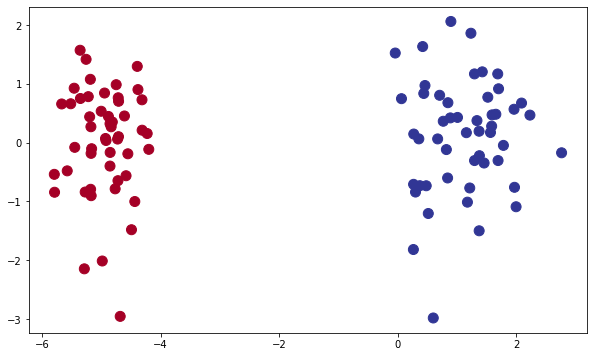

In [13]:
# plot the data
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='RdYlBu',s=100)

### Perceptron Trick:

Let's study the perceptron trick to understand logistic regression. Our goal is to find a line that separates the data perfectly.
<br>
Eq. of line is;
<br>
Ax1 + Bx2 + C = 0

In general,
Ax1 + Bx2 + Cx3 + Dx4 +...= 0
<br>
where,
- A,B,C are the coefficient or weights of the features
- x1,x2,x3 are independent features

Firstly, you start with random values of A, B and C. You can start with A=B=C=1. Then we pick a random point and check if the point lies on the correct side of the line or not.
<br>
There are two scenarios to consider after we pick a point:
- If a point is correctly classified, do nothing.

- If a point is incorrectly classified, adjust the line in such a way that it is classified.

In [14]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

n = lr = learning rate

We create a loop and repeat from step 1 for an appropriate number of epochs or until all the data points are picked and correctly classified.
- initializing step function
- Randomly select a point then,
- weight_new = weight_old + n(yi - ŷ)Xi

In [15]:
def step(z):
    return 1 if z>0 else 0

In [16]:
intercept_,coef_ = perceptron(X,y)
print(coef_)
print(intercept_)

[1.1134548  0.33857969]
1.3000000000000003


In [17]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [18]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

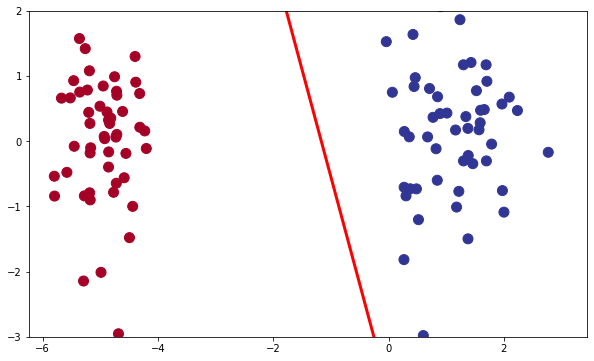

In [19]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='RdYlBu',s=100)
plt.ylim(-3,2)

After using **"Perceptron Trick"** at least this model classify the points correctly. Lets compare with Logistic Regression using Scikit-learn.

### Logistic Regression using Scikit-Learn:

In [20]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [21]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [22]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

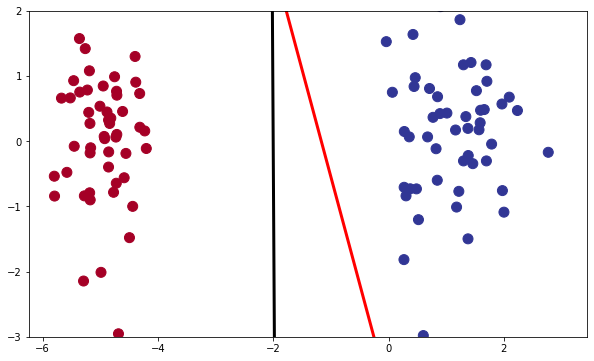

In [23]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='RdYlBu',s=100)
plt.ylim(-3,2)

**Black line** shows logistic regression with Scikit-learn and **Red line** shows our perceptron trick model, I conclude that it's big difference which means our model doesn't fit correctly. Need more improvements on that model.

### Sigmoid Function (Maximum Likelihood, Cross Entropy):

Replacing **'step function'** in the perceptron trick with **'Sigmoid Function'**. Lets see what result generate.
<br>
The sigmoid function is a fundamental element of logistic regression, allowing us to map linear combinations of input features to probabilities.

In [24]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [25]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [26]:
intercept_,coef_ = perceptron(X,y)

In [27]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [28]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

(-3.0, 2.0)

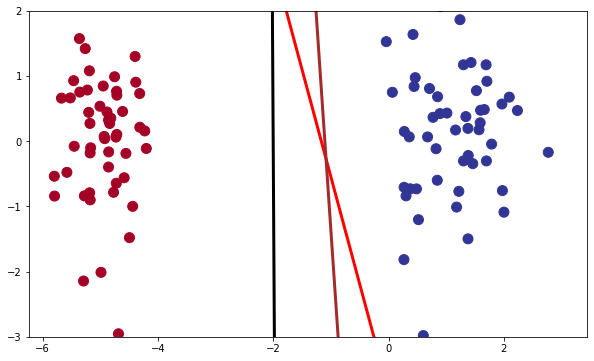

In [29]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='brown',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='RdYlBu',s=100)
plt.ylim(-3,2)

After a while, our solution is good but far from the correctly classifying. **'Brown line'** shows the logistic regression line using Sigmoid Function.